In [1]:
#!pip install xgboost
#!pip install shap

In [5]:
import pandas as pd
import numpy as np

#import xgboost as xgb
import shap
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle
import warnings

import re  

import gc

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance


In [6]:
#Reading in data
df = pd.read_csv(r"/home/zahid/epic_lab/Skill_coaching/rand_df.csv")

In [7]:
df.shape

(301056, 48)

In [8]:
df.head()

,Unnamed: 0,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
0,590383,518642783,-472128670181922995,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,...,611310.0,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,211885.940,77119.7200,executive director of psl iti
1,464616,66791572,-2025912237164248888,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108652.150,42986.0400,business development and sales manager
2,215102,387815039,-1756752323363501779,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,...,237210.0,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,84556.680,5815.8657,project coordinator
3,463719,484984771,-7716377431440668051,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,...,561311.0,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,45884.164,7257.3540,account manager
4,486002,2133756552,-3377771639329560726,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,...,923110.0,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,38944.450,0.0000,elementary school teacher


In [9]:
df.tail()

,Unnamed: 0,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
301051,287360,364163929,329469143052034433,The University of Texas at Dallas,linkedin.com/school/university-of-texas-at-dallas,the university of texas at dallas,"Richardson, Texas, US",Northern America,United States,Texas,...,611310.0,"Colleges, Universities, and Professional Schools",Education Services,Higher Education and Research,Research Universities,0DC960-E,TEXAS SYSTEM UNIVERSITY OF,53612.170,0.0000,teaching assistant
301052,239935,461596273,-1185104988335526521,ValueLabs,linkedin.com/company/valuelabs,valuelabs,"Hyderabad, Telangana, India",Southern Asia,India,Telangana,...,518210.0,"Computing Infrastructure Providers, Data Proce...",Information Technology Services,Software and Technology Services,Advanced Technology and Software Engineering S...,06BZM6-E,VALUELABS SERVICES PVT LTD,23999.254,1294.1617,software engineer
301053,533449,423277159,-1012829260828153322,Instinctive Networx (P) LTD,NaN,instinctive networx p ltd,"Kolkata, West Bengal, India",Southern Asia,India,West Bengal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9920.770,2729.0073,buisness development manager
301054,573054,397247554,-1057477355379537142,KINESSO,linkedin.com/company/kinesso,kinesso,"New York, United States",Northern America,United States,New York,...,541810.0,Advertising Agencies,Information Technology Services,Digital Analytics Software,Digital Marketing and Analytics,000N2T-E,INTERPUBLIC GROUP OF COS INC,187284.610,73133.8000,manager paid search
301055,564307,676748913,8797344840678784417,AMD,linkedin.com/company/amd,amd,"Sunnyvale, CA",Northern America,United States,California,...,334413.0,Semiconductor and Related Device Manufacturing,Electronics Manufacturing,Electronics and Components Manufacturing,Semiconductor and Electronics Manufacturing,000BK7-E,ADVANCED MICRO DEVICES INC,259610.470,40872.2850,member of technical staff


In [10]:
#Dropping unnamed column
df.drop(df.columns[0],axis=1,inplace=True)

In [11]:
df.head()

,user_id,position_id,company_raw,company_linkedin_url,company_cleaned,location_raw,region,country,state,metro_area,...,naics_code,naics_description,rics_k50,rics_k200,rics_k400,ultimate_parent_factset_id,ultimate_parent_factset_name,total_compensation,additional_compensation,title_translated
0,518642783,-472128670181922995,ESPCI,linkedin.com/school/espci,espci,Greater Paris Metropolitan Region,Western Europe,France,Ile-de-France,paris metropolitan area,...,611310.0,"Colleges, Universities, and Professional Schools",Research and Development,Research and Development,Research and Development,06H6J9-E,ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMIE DE P...,211885.940,77119.7200,executive director of psl iti
1,66791572,-2025912237164248888,World Business Network,NaN,world business network,"Dubai, UAE",Arab States,United Arab Emirates,Dubai,dubai metropolitan area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108652.150,42986.0400,business development and sales manager
2,387815039,-1756752323363501779,"Ascent Construction, Inc.",linkedin.com/company/ascent-construction-inc.,ascent construction inc,Salt Lake City Metropolitan Area,Northern America,United States,Utah,salt lake city metropolitan area,...,237210.0,Land Subdivision,Engineering and Construction Services,Construction and Contracting Services,Commercial Construction Services,086JP9-E,ASCENT CONSTRUCTION CO INC,84556.680,5815.8657,project coordinator
3,484984771,-7716377431440668051,Lab Support,linkedin.com/company/apex-systems,lab support,Ireland,Northern Europe,Ireland,empty,ireland nonmetropolitan area,...,561311.0,Employment Placement Agencies,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,0015J8-E,ASGN INCORPORATED,45884.164,7257.3540,account manager
4,2133756552,-3377771639329560726,Frisco ISD,linkedin.com/company/frisco-isd,frisco isd,"Dallas, Texas, United States",Northern America,United States,Texas,dallas metropolitan area,...,923110.0,Administration of Education Programs,Education Services,Educational Institutions,Educational Institutions,NaN,NaN,38944.450,0.0000,elementary school teacher


In [12]:
df.describe()

,user_id,position_id,remote_suitability,weight,start_salary,end_salary,seniority,salary,position_number,rcid,ultimate_parent_rcid,naics_code,total_compensation,additional_compensation
count,3.010560e+05,3.010560e+05,301056.000000,301056.000000,3.009120e+05,3.009340e+05,301056.000000,3.009340e+05,301056.000000,2.187440e+05,2.187340e+05,217437.000000,3.009340e+05,3.009340e+05
mean,6.345460e+08,1.109496e+16,0.526630,1.299033,4.248987e+04,5.016435e+04,2.340983,5.016435e+04,3.580228,1.017895e+07,1.162406e+07,538628.614449,6.765672e+04,1.749237e+04
std,5.905222e+08,5.325364e+18,0.258070,0.341351,3.944229e+04,4.781991e+04,1.483672,4.781991e+04,3.621031,2.248308e+07,2.329047e+07,172718.187422,1.036005e+05,6.876127e+04
min,1.005021e+06,-9.223338e+18,0.000016,1.000000,4.044952e+02,4.837763e+02,1.000000,4.837763e+02,1.000000,2.500000e+01,4.300000e+01,111110.000000,5.797670e+02,0.000000e+00
25%,2.295508e+08,-4.596714e+18,0.390711,1.074322,1.702951e+04,1.977022e+04,1.000000,1.977022e+04,1.000000,6.391720e+05,6.893290e+05,455110.000000,2.244094e+04,1.484465e+03
50%,4.730563e+08,-7.823733e+14,0.500000,1.200051,3.191539e+04,3.679674e+04,2.000000,3.679674e+04,2.000000,1.300504e+06,1.398143e+06,525910.000000,4.246237e+04,4.277938e+03
75%,8.075275e+08,4.638228e+18,0.706399,1.412042,5.479794e+04,6.419389e+04,3.000000,6.419389e+04,5.000000,7.186992e+06,1.193840e+07,611310.000000,7.557081e+04,1.068194e+04
max,2.183867e+09,9.223359e+18,0.999984,9.472703,1.600000e+06,1.600000e+06,7.000000,1.600000e+06,133.000000,1.004165e+08,1.004174e+08,999999.000000,9.505619e+06,9.273360e+06


In [13]:
#Cleaning data but not imputing missing values
REMOVE_NA = True
KNOWN_NA_VALS = ['NIL', 'NILL', 'NULL', 'NA', '#NA', '#N/A', 'N/A','#VALUE!','#REF!','#DIV/0!','#NUM!','#NAME?','#NULL!','NAN','nan','NaN']

In [14]:
############################################################################################
# Experimental code here. Trying to replace Known values which means NULL / NA to np.nan
# Ideally this should help our analysis.
############################################################################################
for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    if len(df[df[x].isin(KNOWN_NA_VALS)]) > 0: #some instances were found with Known NA substitutions
        df.loc[ df[x].isin(KNOWN_NA_VALS), x ] = np.nan
        print("Found some known NA substitutions in {}. Will replace and try to force as numeric".format(x))
    try: #now we will try to see if the column can become numeric
        df[x] = pd.to_numeric(df[x], errors='raise')
    except ValueError as e:
        continue #Column cannot be converted to numeric. Just continue
############################################################################################

############################################################################################
# Experiment 2: If all endings are % or $ or # then we will try to strip these and check if 
#     the column can be converted as a numeric value
############################################################################################
sp_endings = ['%', '$', '#', '£', 'GBP', 'gbp', 'usd', 'USD' ,'eur', 'EUR']

for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    for sp in sp_endings:
        totals = df[x].astype(str).str.endswith(sp).sum() + df[x].isna().sum()
        if totals == len(df): #Either all entries end with special char or are null
            temp = df[x].astype(str).str.replace(sp, '')
            try:
                temp_numeric = pd.to_numeric(temp, errors='raise')
                df[x] = temp_numeric #if we were able to convert to numeric then we keep this
                                    # in our dataframe. else no change
                print("Modified column {} for special endings {} and changed to numeric".format(
                        x, sp))
            except ValueError as ve:
                continue
############################################################################################
# Same code as above but for string beginnings

for x in [x for x in df.columns if df[x].dtype.kind.lower() in ('o', 's', 'u', 'v')]:
    for sp in sp_endings:
        totals = df[x].astype(str).str.startswith(sp).sum() + df[x].isna().sum()
        if totals == len(df): #Either all entries end with special char or are null
            temp = df[x].astype(str).str.replace(sp, '')
            try:
                temp_numeric = pd.to_numeric(temp, errors='raise')
                df[x] = temp_numeric #if we were able to convert to numeric then we keep this
                                    # in our dataframe. else no change
                print("Modified column {} for special startings {} and changed to numeric".format(
                        x, sp))
            except ValueError as ve:
                continue
############################################################################################
# Now we have to deal with NA values
if REMOVE_NA == True:
    df = df.dropna(axis=0, how='all')
else:
    for x in [x for x in df.columns]:
        if df[x].dtype.kind in ('f', 'c', 'i', 'u'):
            df[x].fillna(df[x].median(),inplace=True)
    #df = df.fillna(np.nan)
    #df = df.fillna(np.nan)
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
############################################################################################

    
############################################################################################    
#We will delete any column if it is Completely np.nan
a = df.isna().sum(axis=0)
FULL_NA_COLS = [x for x in a[df.isna().sum(axis=0) == len(df)].index]
df = df.drop(FULL_NA_COLS, axis=1)

Found some known NA substitutions in title_raw. Will replace and try to force as numeric
Found some known NA substitutions in ticker. Will replace and try to force as numeric
Found some known NA substitutions in ultimate_parent_factset_name. Will replace and try to force as numeric


In [15]:
#Text components columns
df.select_dtypes(include=['object']).shape[1]

33

In [16]:
#Numerical components columns
df.select_dtypes(exclude=['object']).shape[1]

14

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'position_id'}>,
        <Axes: title={'center': 'remote_suitability'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'start_salary'}>,
        <Axes: title={'center': 'end_salary'}>,
        <Axes: title={'center': 'seniority'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'position_number'}>,
        <Axes: title={'center': 'rcid'}>,
        <Axes: title={'center': 'ultimate_parent_rcid'}>,
        <Axes: title={'center': 'naics_code'}>],
       [<Axes: title={'center': 'total_compensation'}>,
        <Axes: title={'center': 'additional_compensation'}>, <Axes: >,
        <Axes: >]], dtype=object)

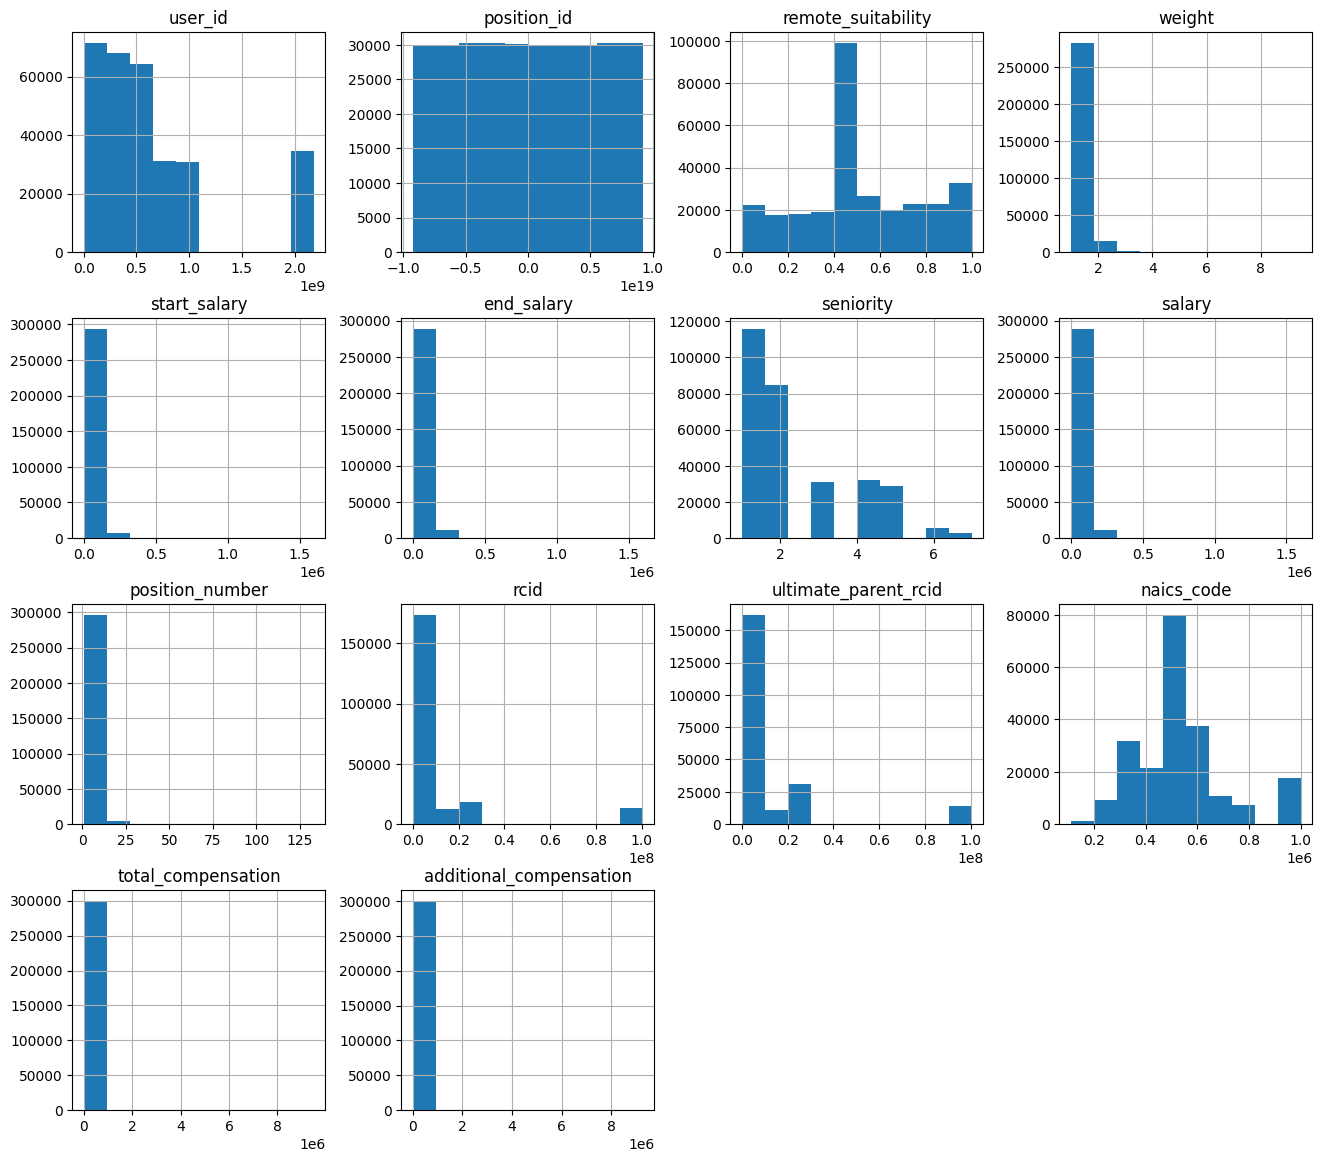

In [17]:
#Plotting numerical data distribuion
df.hist(figsize=(16,14))

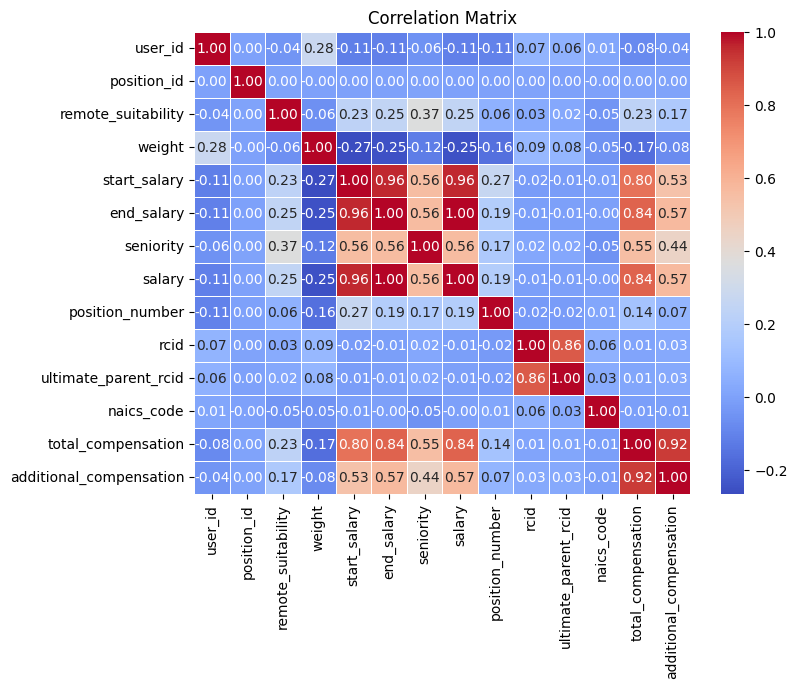

20244

In [18]:
#Seeing which numerical features are correlated so not all are included in the training model

df1 = df.select_dtypes(exclude=['object'])
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

del(df1)
gc.collect()

In [19]:
df1 = df[['job_category', 'role_k50', 'rics_k50', 'naics_description', 'country', 'remote_suitability','total_compensation', 'start_salary', 'seniority']]

In [20]:
for i in np.arange(0,len(df1.columns)):
    val_cnt = df1[df1.columns[i]].value_counts()
    miss_vals = df1[df1.columns[i]].isna().sum()
    print("For feature {} we have the below stats:".format(df1.columns[i]))
    print("Value counts length {}".format(len(val_cnt)))
    print("Missing Values are {}\n".format(miss_vals))

del(df1)
gc.collect()

For feature job_category we have the below stats:
Value counts length 7
Missing Values are 0

For feature role_k50 we have the below stats:
Value counts length 50
Missing Values are 0

For feature rics_k50 we have the below stats:
Value counts length 50
Missing Values are 82336

For feature naics_description we have the below stats:
Value counts length 1013
Missing Values are 83619

For feature country we have the below stats:
Value counts length 224
Missing Values are 0

For feature remote_suitability we have the below stats:
Value counts length 25879
Missing Values are 0

For feature total_compensation we have the below stats:
Value counts length 299734
Missing Values are 122

For feature start_salary we have the below stats:
Value counts length 300877
Missing Values are 144

For feature seniority we have the below stats:
Value counts length 7
Missing Values are 0



0

Analysis date (latest date in data): 2025-02-01

Forcing numeric columns to numeric type (errors='coerce')...
Total NaNs in numeric features after coercion:
tenure_days             0
total_compensation     90
start_salary          117
seniority               0
remote_suitability      0
dtype: int64
Cleaning bad strings from categorical columns...
Categorical cleaning complete.

Training set shape: (201672, 8)
Test set shape: (50418, 8)

Total features after one-hot encoding: 269

Training RandomForestClassifier...
Model training complete.

--- RandomForest Model Evaluation Results ---

Classification Report:
                 precision    recall  f1-score   support

Not Churned (0)       0.72      0.54      0.62     14697
    Churned (1)       0.83      0.92      0.87     35721

       accuracy                           0.81     50418
      macro avg       0.78      0.73      0.74     50418
   weighted avg       0.80      0.81      0.80     50418


ROC-AUC Score: 0.8510

Saving model to

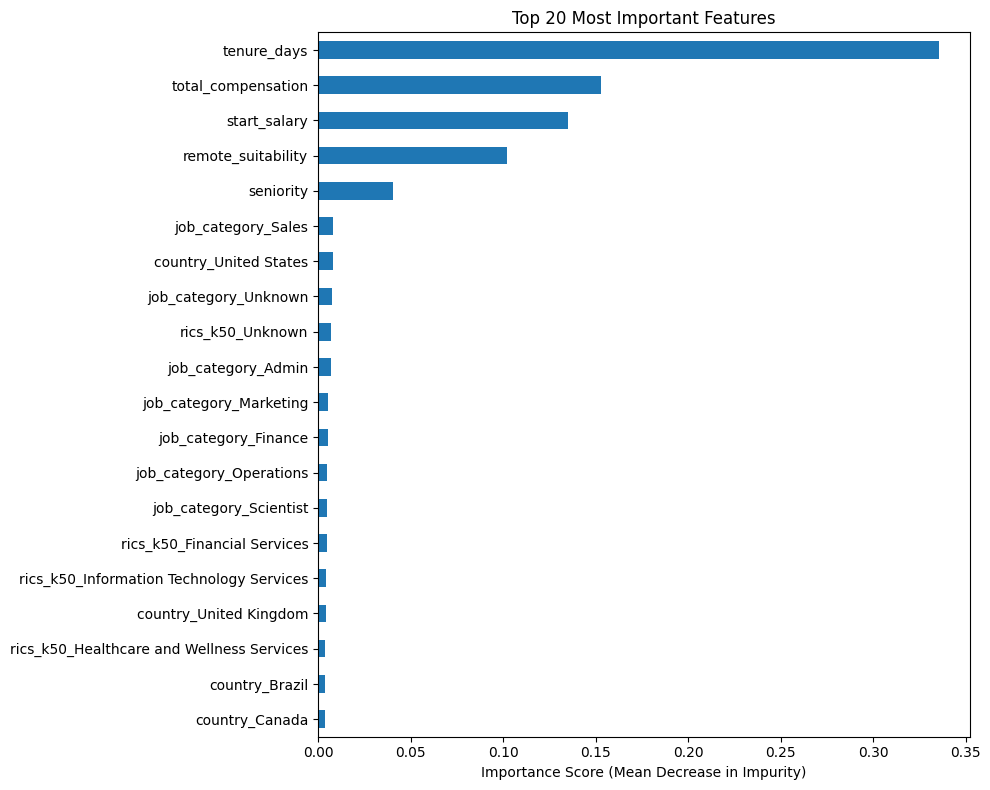

In [21]:
# Suppress warnings
warnings.filterwarnings('ignore')


MODEL_FILENAME = 'churn_model.pkl'

try:

    # Computing churn
    df['churn'] = np.where(df['enddate'].isnull(), 0, 1)
    df['startdate'] = pd.to_datetime(df['startdate'], errors='coerce')
    df['enddate'] = pd.to_datetime(df['enddate'], errors='coerce')
    df = df.dropna(subset=['startdate'])
    
    analysis_date = max(df['startdate'].max(), df['enddate'].max())
    print(f"Analysis date (latest date in data): {analysis_date.date()}")

    df['tenure_days'] = np.where(
        df['churn'] == 1,
        (df['enddate'] - df['startdate']).dt.days,
        (analysis_date - df['startdate']).dt.days
    )
    df = df[df['tenure_days'] >= 0] # Clean edge cases

    #FEATURE SELECTION
    numeric_features = ['tenure_days', 'total_compensation', 'start_salary', 'seniority', 'remote_suitability']
    categorical_features = ['job_category', 'country', 'rics_k50']
    target = 'churn'

    # Data Cleaning Step 1: Numeric
    print("\nForcing numeric columns to numeric type (errors='coerce')...")
    for col in numeric_features:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Total NaNs in numeric features after coercion:\n{df[numeric_features].isnull().sum()}")

    # Data Cleaning Step 2: Categorical
    print("Cleaning bad strings from categorical columns...")
    
    def clean_categorical(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip()
        if '[' in s or ']' in s or 'E' in s:
            return np.nan  # Nullify if found
        return s

    for col in categorical_features:
        if col in df.columns:
            df[col] = df[col].apply(clean_categorical)
    
    print("Categorical cleaning complete.")
    
    X = df[numeric_features + categorical_features]
    y = df[target]

    # Preprocessing Pipeline
    numeric_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

    numeric_transformer = Pipeline(steps=[
        ('imputer', numeric_imputer),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', categorical_imputer),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='drop'
    )

    #Data Split & Preprocessing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")

    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    try:
        ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
        all_feature_names = numeric_features + list(ohe_feature_names)
        print(f"\nTotal features after one-hot encoding: {len(all_feature_names)}")
    except Exception as e:
        print(f"Could not get all feature names: {e}")
        all_feature_names = None

    # Model Training
    print("\nTraining RandomForestClassifier...")
    
    # Use class_weight='balanced' to help with imbalance
    final_model = RandomForestClassifier(
        random_state=42, 
        n_estimators=100, 
        class_weight='balanced',
        n_jobs=-1  # Use all available cores
    )
    
    final_model.fit(X_train_processed, y_train)
    print("Model training complete.")

    # --- Evaluation ---
    y_pred = final_model.predict(X_test_processed)
    y_pred_proba = final_model.predict_proba(X_test_processed)[:, 1]
    print("\n--- RandomForest Model Evaluation Results ---")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Churned (0)', 'Churned (1)']))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Save Model 
    print(f"\nSaving model to '{MODEL_FILENAME}'...")
    with open(MODEL_FILENAME, 'wb') as f:
        model_payload = {'preprocessor': preprocessor, 'model': final_model}
        pickle.dump(model_payload, f)
    print("Model saved successfully.")

    # Feature Importance Analysis
    print("\nGenerating Feature Importance plot...")
    
    if all_feature_names:
        # Get importances from the trained model
        importances = final_model.feature_importances_
        
        # Create a pandas Series
        importance_series = pd.Series(importances, index=all_feature_names)
        
        # Sort and print the top 20
        top_20_features = importance_series.sort_values(ascending=False).head(20)
        print("\nTop 20 Most Important Features:")
        print(top_20_features)
        
        # Create and Save a Bar Plot
        plt.figure(figsize=(10, 8))
        top_20_features.sort_values(ascending=True).plot(kind='barh')
        plt.title('Top 20 Most Important Features')
        plt.xlabel('Importance Score (Mean Decrease in Impurity)')
        plt.tight_layout()
        plot_filename = 'feature_importance_plot.png'
        plt.savefig(plot_filename)
        print(f"Feature importance plot saved to '{plot_filename}'")
        
    else:
        print("Could not generate feature importance plot (feature names are missing).")


except Exception as e:
    print(f"An error occurred: {e}")

An error occurred during PDP generation: index 2 is out of bounds for axis 0 with size 2


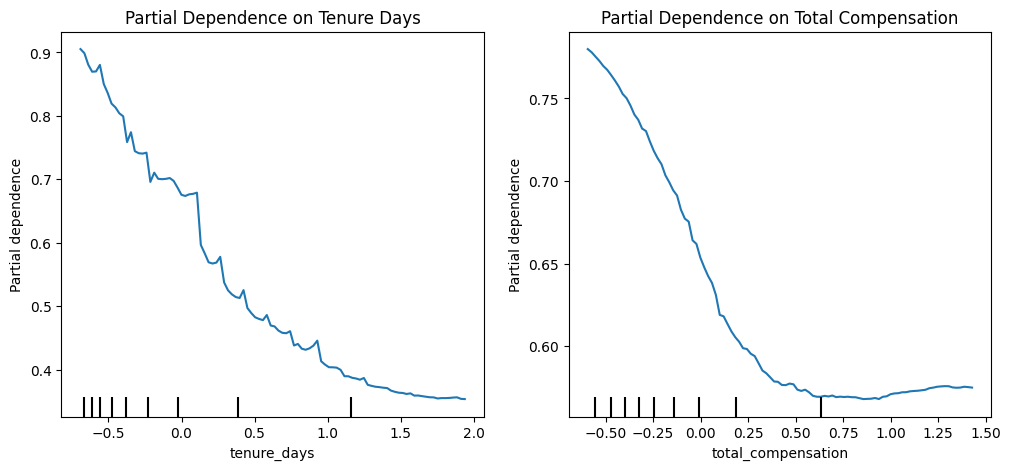

In [22]:
try:
    # Check if variables exist
    if 'final_model' in locals() and 'X_test_processed' in locals() and 'all_feature_names' in locals():
        
        # Size of plots
        fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

        #Plot 1: PDP for tenure_days
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['tenure_days'],  
            feature_names=all_feature_names, 
            target=1,
            ax=ax[0]
        )
        ax[0].set_title('Partial Dependence on Tenure Days')
        ax[0].set_ylabel('Churn Probability')

        #Plot 2: PDP for total_compensation
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['total_compensation'],
            feature_names=all_feature_names,
            target=1,
            ax=ax[1]
        )
        ax[1].set_title('Partial Dependence on Total Compensation')
        ax[1].set_ylabel('Churn Probability')

        #Plot 3: PDP for remote_suitability
        PartialDependenceDisplay.from_estimator(
            final_model,
            X_test_processed,
            features=['remote_suitability'],
            feature_names=all_feature_names,
            target=1,
            ax=ax[2]
        )
        ax[1].set_title('Partial Dependence on Remote Suitability')
        ax[1].set_ylabel('Churn Probability')

        #Save figures
        plt.tight_layout()
        pdp_plot_filename = 'pdp_plots.png'
        plt.savefig(pdp_plot_filename)
        print(f"PDP plots saved to '{pdp_plot_filename}'")
    
    else:
        print("Error: Could not generate PDP plots.")
        print("Make sure 'final_model', 'X_test_processed', and 'all_feature_names' exist.")

except Exception as e:
    print(f"An error occurred during PDP generation: {e}")

In [ ]:
# Compute feature importance (using permutation)
result = permutation_importance(
    final_model, X_test_processed, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
# sorted_idx = result.importances_mean.argsort()

# # Use the correct feature names for the processed data
# if 'all_feature_names' in locals() and all_feature_names is not None:
#     feature_labels = [all_feature_names[i] for i in sorted_idx]
# else:
#     # Fallback: use generic feature names
#     feature_labels = [f"Feature_{i}" for i in sorted_idx]

# # Create a bar plot
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.boxplot(
#     result.importances[sorted_idx].T,
#     vert=False,
#     labels=feature_labels,
# )
# ax.set_title("Permutation Importances")
# fig.tight_layout()
# plt.show()

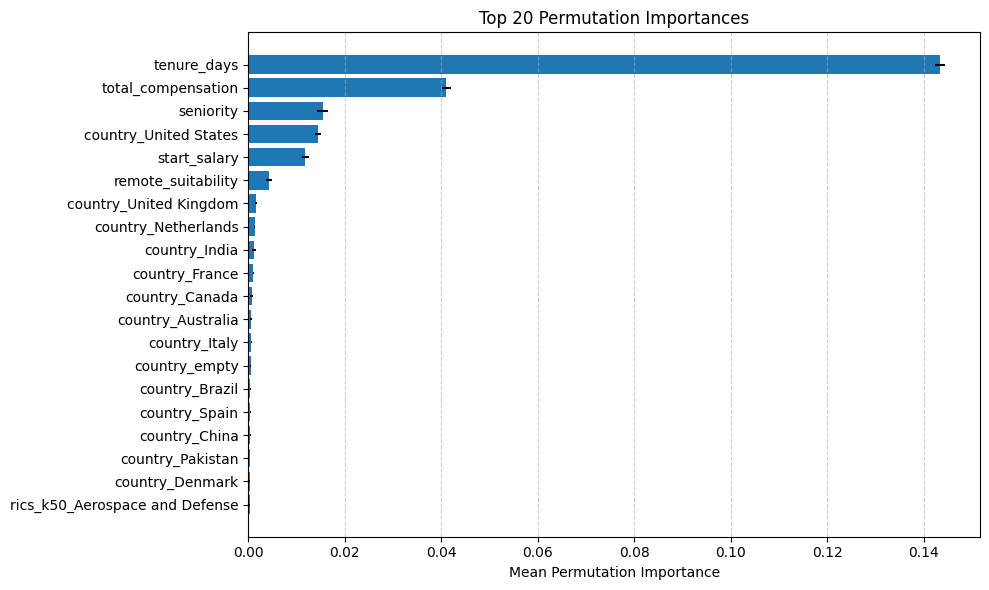

In [30]:
# Sort indices by mean importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Feature labels
if 'all_feature_names' in locals() and all_feature_names is not None:
    feature_labels = np.array(all_feature_names)
else:
    feature_labels = np.array([f"Feature_{i}" for i in range(len(sorted_idx))])

# Select top N features
top_n = 20
top_idx = sorted_idx[:top_n]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    feature_labels[top_idx][::-1],   # reverse for descending order
    result.importances_mean[top_idx][::-1],
    xerr=result.importances_std[top_idx][::-1],
    align='center'
)
plt.xlabel("Mean Permutation Importance")
plt.title(f"Top {top_n} Permutation Importances")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

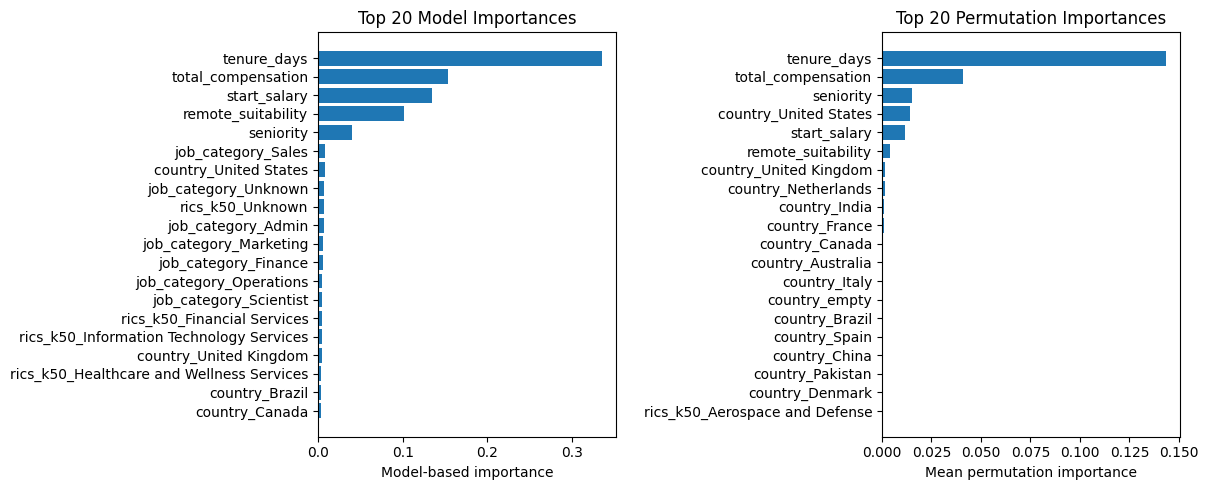

In [31]:
# Model-based importances (if supported)
model_importances = final_model.feature_importances_
sorted_idx = np.argsort(model_importances)[::-1][:20]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(np.array(all_feature_names)[sorted_idx][::-1], model_importances[sorted_idx][::-1])
plt.title("Top 20 Model Importances")
plt.xlabel("Model-based importance")

# Permutation importances
perm_sorted_idx = result.importances_mean.argsort()[::-1][:20]
plt.subplot(1, 2, 2)
plt.barh(np.array(all_feature_names)[perm_sorted_idx][::-1], result.importances_mean[perm_sorted_idx][::-1])
plt.title("Top 20 Permutation Importances")
plt.xlabel("Mean permutation importance")

plt.tight_layout()
plt.show()


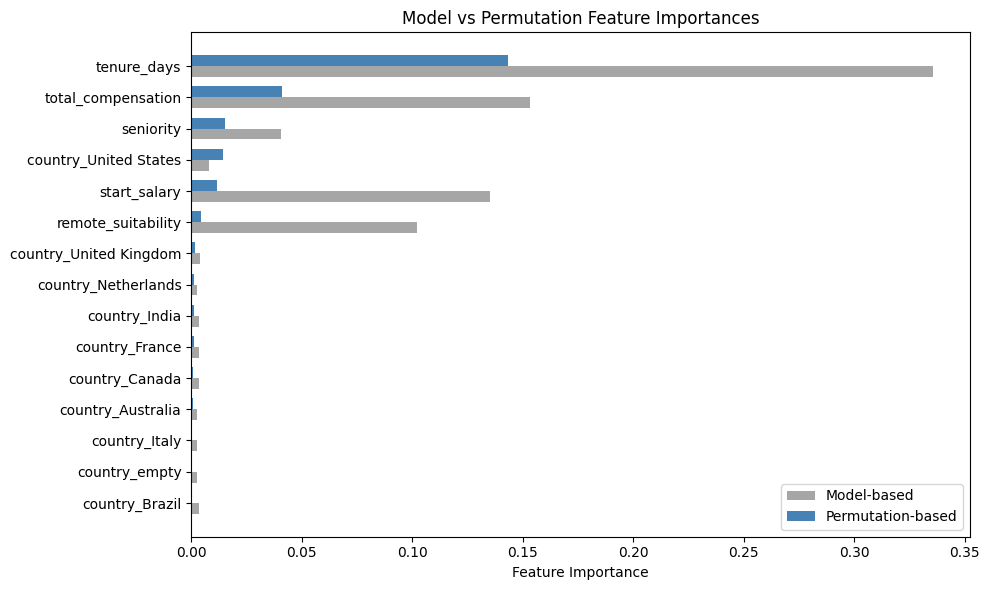

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Example arrays: replace with real data
model_imp = final_model.feature_importances_
perm_imp = result.importances_mean
features = np.array(all_feature_names)

# Sort by model importance or permutation importance
sorted_idx = np.argsort(perm_imp)[-15:]

plt.figure(figsize=(10, 6))
width = 0.35
y = np.arange(len(sorted_idx))

plt.barh(y - width/2, model_imp[sorted_idx], height=width, label='Model-based', color='gray', alpha=0.7)
plt.barh(y + width/2, perm_imp[sorted_idx], height=width, label='Permutation-based', color='steelblue')

plt.yticks(y, features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Model vs Permutation Feature Importances')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
len(sorted_idx)

269

In [28]:
sorted_idx

array([  6, 240,   5,   9, 231, 228,   7, 235, 259, 242, 261, 255, 265,
       127, 233, 227, 191, 170, 248,  52, 250, 234, 186, 128,  60, 262,
       108, 184, 247, 241, 152, 160, 246,  15, 211, 157, 257,  76, 113,
        91,  70, 194, 134,  92, 216,  31,  45, 208, 268, 219,  59, 168,
       229,  93, 121, 230, 267, 263,  94, 220, 106,  86, 243, 217,  54,
       204,  42, 112, 109,  22, 223,  43,  37, 146, 111, 143, 172,  99,
        17,  16,  13,  14,  19,  20,  84, 101,  95,  90,  89,  88,  85,
        87,  82, 131, 107, 132, 133, 123, 125, 124, 126, 114,  74,  73,
       115, 117,  75,  80,  83, 189,  66,  57,  58,  62, 178, 177,  55,
        56, 196, 192, 188, 197, 169, 155, 153, 154, 162, 159,  69,  67,
       150, 138, 137, 135, 141, 140, 139, 144, 148, 118, 119, 120, 174,
       173, 175,  50,  44,  41,  38,  48,  23, 218,  33,  36,  35,  34,
        28,  30, 221,  51,  49, 200, 210, 182, 183, 185, 206, 205, 202,
       251, 151,  63, 161, 129, 105, 222,  39,   8,  12,  77, 13

In [27]:
X_test.columns[:]

Index(['tenure_days', 'total_compensation', 'start_salary', 'seniority',
       'remote_suitability', 'job_category', 'country', 'rics_k50'],
      dtype='object')

In [19]:
assert True == False

AssertionError: 

In [ ]:
with open(MODEL_FILENAME, "rb") as file:
    final_model = pickle.load(file)

In [ ]:
final_model = final_model['model']